# Villin simple design
Here we attempt to do the simplest possible modelling, which just tries to introduce new side chains at random that improve the total energy. We use the simple villin headpiece subdomain as an example. The more advanced usage designed for repeat proteins are not required. We use a favourite protein as a toy model.

In [5]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from repeatdesigner import designer as rd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will optimize a single residue, which happens to have been mutated experimentally into a histidine. In this case thigs should work so that we get a rather well converged optimization. We create an instance of the Design class, defining as target residue 25 in the sequence.

In [6]:
villin_des = rd.Design(pdb="pdbs/1vii.pdb", targets=[27])

 Generated new protein design 
 .. name : pdbs/1vii
 .. file : pdbs/1vii.pdb
 .. sequence : MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF
 .. target residues :  [27]


Then we create the optimizer, passing arguments like the inverse temperature (`beta`) that will determine the acceptance, the length of the run (`len_mc`) and the number of runs (`nruns`, always think about your number of processors).

In [7]:
mc_villin = rd.Optimizer(villin_des, beta=5e-2, len_mc=50, nruns=3)
mc_villin.run_mc()

MLSDEDFKAVFGMTRSAFANLPLWKQQFLKKEKGLF [[-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1207.2847900390625], [-1236.9210205078125], [-1236.9210205078125], [-1236.9210205078125], [-1242.2457275390625], [-1242.2457275390625], [-1242.2457275390625], [-1242.2457275390625], [-1242.2457275390625], [-1242.2457275390625], [-1242.2457275390625], [-1165.716064453125], [-1165.716064453125], [-1165.716064453125], [-1165.716064453125], [-1165.716064453125], [-1208.1278076171875], [-1208.1278076171875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [-1254.5955810546875], [

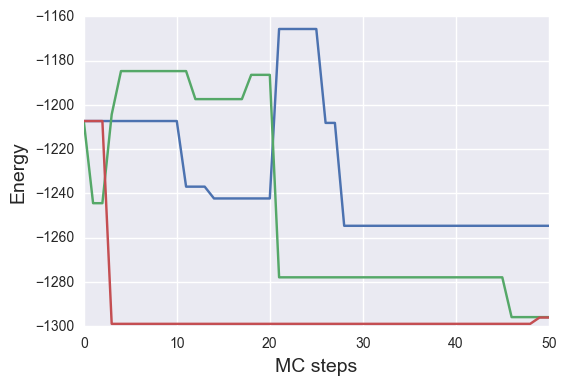

In [8]:
fig, ax = plt.subplots()
for k,v in mc_villin.models.iteritems():
    ax.plot(v['score'])
    print v['seq'], v['score']
ax.set_ylabel('Energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)

In [9]:
import Bio.PDB
import Bio.Seq
import Bio.SeqUtils
import Bio.pairwise2
import Bio.SeqRecord
import Bio.Align.AlignInfo
for k,v in mc_villin.models.iteritems():
    print "%3i %10.2f %s"%(k, v['score'][-1][0], \
        Bio.Seq.Seq(''.join([Bio.SeqUtils.seq1(x.get_resname()) \
                    for x in v['model'].get_residues()])))

KeyError: 'model'

In [ ]:
sequences = [Bio.SeqRecord.SeqRecord(Bio.Seq.Seq(''.join([Bio.SeqUtils.seq1(x.get_resname()) \
                    for x in v['model'].get_residues()]))) \
             for k, v in mc_villin.models.iteritems() if v['score'][-1][0]<-1200.]
print sequences
align =  Bio.Align.MultipleSeqAlignment(sequences)
summary_align = Bio.Align.AlignInfo.SummaryInfo(align)
print villin_des.seq
print summary_align.dumb_consensus(threshold=(0.1))
print summary_align.dumb_consensus(threshold=(0.2))
print summary_align.dumb_consensus(threshold=(0.5))
print summary_align.dumb_consensus(threshold=(0.9))